In [89]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from subprocess import check_output
print(check_output(["ls", "../one_year_data.csv"]).decode("utf8"))


/docker_volumes/machine_learning/venv/machine-learning-stock-market/one_year_data.csv



In [90]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import quandl
import  pylab as pl
import numpy as np
from sklearn.preprocessing import Normalizer
import seaborn as sns
sns.set()
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
from math import sqrt
from sklearn import preprocessing
from ipysheet import from_dataframe, to_dataframe

In [101]:
data = pd.read_csv("../one_year_data.csv", index_col=[0], parse_dates=[0])
returns = data.pct_change().mean() * 252
returns = pd.DataFrame(returns)
#print(returns)
returns.columns = ['Returns']
print (returns.columns)

Index(['Returns'], dtype='object')


In [103]:
returns['Volatility'] = data.pct_change().std() * sqrt(252)
#print(returns['Volatility'])
#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T
#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)
#print(cleaned_data)

In [104]:
print(cleaned_data)

[[ 0.30122854  0.12229411]
 [ 0.39233211  0.13883937]
 [ 0.4577784   0.17931351]
 [ 0.5453609   0.24209401]
 [ 0.28449926  0.13169589]
 [ 0.59672057  0.3055868 ]
 [ 0.55454869  0.21687254]
 [ 0.06900107  0.58597643]
 [-0.4609699   0.39463658]
 [-0.05233203  0.21060774]
 [ 0.36282936  0.18897552]
 [ 0.23787155  0.11244668]
 [ 0.38176298  0.16551017]
 [ 0.14538878  0.13882299]
 [ 0.01924521  0.33355332]
 [-0.14237227  0.27652329]
 [ 0.40536909  0.24127621]
 [ 0.17713885  0.13741004]
 [ 0.02526098  0.31924444]
 [ 0.89524296  0.34574214]
 [ 0.22352758  0.17356319]
 [-0.25883259  0.21045837]
 [ 0.11398299  0.24099993]
 [ 0.12484929  0.1230421 ]
 [ 0.35582932  0.12711033]
 [ 0.27891514  0.15166797]
 [ 0.30016793  0.15361245]
 [ 0.06865777  0.16490062]
 [ 0.46454036  0.20992037]
 [ 0.12715433  0.12118786]
 [ 0.15860478  0.28681502]
 [ 0.16621325  0.10951866]
 [ 0.28694088  0.1309999 ]
 [-0.07580443  0.16479267]
 [ 0.3104091   0.15684368]
 [ 0.24643192  0.12920216]
 [ 0.43798384  0.19431529]
 

Estimated number of clusters: 3


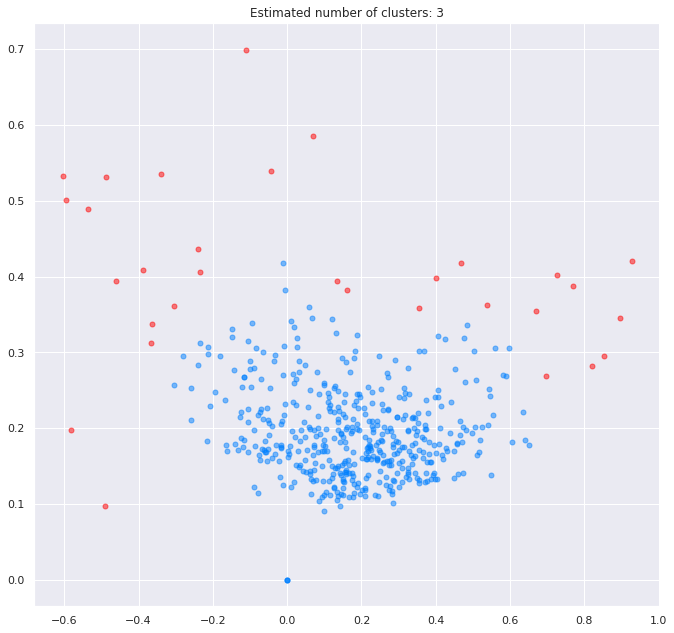

In [107]:
X =  cleaned_data
db = DBSCAN(eps=.05, min_samples=3).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)

unique_labels = set(labels)
plt.figure(num=None, figsize=(10, 10), facecolor='w', edgecolor='k')
for k in unique_labels:
    col=[0,0.5,1,1]
    if k == -1:
        col = [1, 0, 0, 1]
    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col),markersize=5, alpha=0.5)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', color=tuple(col), markersize=5, alpha=0.5)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()